*Note that most of the code cells are hidden from this notebook for a better reading flow. Check out the notebook in the documentation folder in the Github repository for more details.*

# Replicating Keane and Wolpin (1994)

Keane and Wolpin (1994) and the previously published working paper Keane and Wolpin (1994b) generate three different Monte Carlo samples. This notebook replicates some of their results as well as giving other insights into the model.

## Returns to experience

We first plot the returns to experience while holding education constant at the initial ten years. Occupation B is more skill intensive in the sense that own experience has higher return than is the case for Occupation A. There is some general skill learned in Occupation A which is transferable to Occupation B. However, work experience is occupation-specific in Occupation B.

In [1]:
%matplotlib agg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import respy as rp
import warnings

from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.style.use("notebook_material/respy_static/respy.mplstyle")

## Effect of college tuition subsidy

This section replicates Table 6 in Keane and Wolpin (1994) which studies the effect of different amounts of tuition subsidies. First, we are going to show the effect of the tuition subsidy on each of the parametrizations for a sample of 1,000 simulated individuals. After that, Table 6 is replicated where the policy effect is measured as the average difference in experience for 40 samples with 100 invididuals with and without the tutition subsidy. The authors apply a 500 USD tuition subsidy on the first parametrization, 1000 USD on the second and 2000 USD on the third parametrization.

The following figures show the impact of the tuition subsidies for each of the parametrizations next to each other.

In [3]:
# Build simulate function as only parameters change, it can be reused.
params, options, _ = rp.get_example_model("kw_94_one")
options["simulation_agents"] = 4000
params.at[("meas_error", "sd_a"), "value"] = 9999
params.at[("meas_error", "sd_b"), "value"] = 9999

In [4]:
simulate = rp.get_simulate_func(params, options)

models = np.repeat(["one", "two", "three"], 2)
tuition_subsidies = [0, 500, 0, 1000, 0, 2000]

data_frames = []

for model, tuition_subsidy in zip(models, tuition_subsidies):
    params, _, _ = rp.get_example_model(f"kw_94_{model}")
    params.loc[("nonpec_edu", "hs_graduate"), "value"] += tuition_subsidy
    # experiment with measurement error
    # params.at[("meas_error", "sd_a"), "value"] = 9999
    # params.at[("meas_error", "sd_b"), "value"] = 9999
    data_frames.append(simulate(params))

In [5]:
params

value  lower  upper  \
category    name                                                 
delta       delta                          0.950    0.7    1.0   
wage_a      constant                       8.000    NaN    NaN   
            exp_edu                        0.070    NaN    NaN   
            exp_a                          0.055    NaN    NaN   
            exp_a_square                   0.000    NaN    NaN   
            exp_b                          0.000    NaN    NaN   
            exp_b_square                   0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
            period                         0.000    NaN    NaN   
            is_minor                       0.000    NaN    NaN   
            any_exp_a                      0.000    NaN    NaN   
            work_a_lagged                  0.000    NaN    NaN   
nonpec_a    constant                       0.000    NaN    NaN   
            not_exp_a_lagged               0.000    NaN    NaN   
            not_any_exp_a                  0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
wage_b      constant                       7.900    NaN    NaN   
            exp_edu                        0.070    NaN    NaN   
            exp_a                          0.055    NaN    NaN   
            exp_a_square                   0.000    NaN    NaN   
            exp_b                          0.060    NaN    NaN   
            exp_b_square                   0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
            period                         0.000    NaN    NaN   
            is_minor                       0.000    NaN    NaN   
            any_exp_b                      0.000    NaN    NaN   
            work_b_lagged                  0.000    NaN    NaN   
nonpec_b    constant                       0.000    NaN    NaN   
            not_exp_b_lagged               0.000    NaN    NaN   
            not_any_exp_b                  0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
nonpec_edu  constant                    5000.000    NaN    NaN   
            is_return_not_high_school -20000.000    NaN    NaN   
            is_return_high_school     -20000.000    NaN    NaN   
            period                         0.000    NaN    NaN   
            is_minor                       0.000    NaN    NaN   
            hs_graduate                -3000.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
nonpec_home constant                   21500.000    NaN    NaN   
            is_young_adult                 0.000    NaN    NaN   
            is_adult                       0.000    NaN    NaN   
            hs_graduate                    0.000    NaN    NaN   
            co_graduate                    0.000    NaN    NaN   
shocks      sd_a                           1.000    NaN    NaN   
            sd_b                           1.000    NaN    NaN   
            sd_edu                      7000.000    NaN    NaN   
            sd_home                     8500.000    NaN    NaN   
            corr_b_a                       0.500    NaN    NaN   
            corr_edu_a                     0.000    NaN    NaN   
            corr_edu_b                     0.000    NaN    NaN   
            corr_home_a                    0.000    NaN    NaN   
            corr_home_b                    0.000    NaN    NaN   
            corr_home_edu                 -0.500    NaN    NaN   
meas_error  sd_a                           0.001    0.0    NaN   
            sd_b                           0.001    0.0    NaN   

                

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(8, 12), sharey=True, sharex=True)

axs = axs.flatten()

for df, ax, model, tuition_subsidy in zip(data_frames, axs, models, tuition_subsidies):
    shares = df.groupby("Period").Choice.value_counts(normalize=True).unstack()[["home", "edu", "a", "b"]]

    shares.plot.bar(stacked=True, ax=ax, width=1, legend=True)

    ax.set_ylim(0, 1)
    ax.set_xticks(range(0, 40, 5))
    ax.set_xticklabels(range(0, 40, 5), rotation="horizontal")
    ax.set_ylabel("Share of population")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    ax.set_title(f"Parametrization {model.title()} \n with a tuition subsidy of {tuition_subsidy} USD")
    
fig.legend(
    handles,
    ["Home", "Education", "A", "B"],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.01),
    ncol=4
);

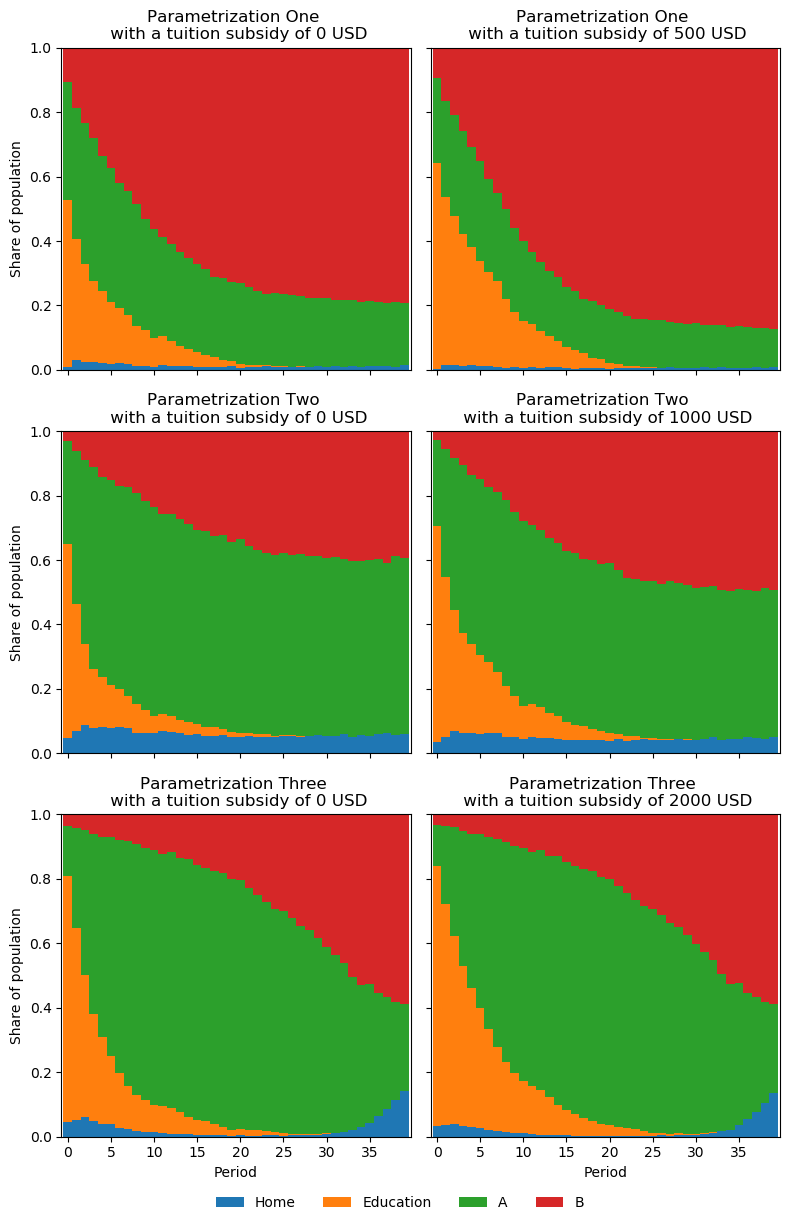

In [7]:
fig

In [8]:
df["Bootstrap_Sample"] = pd.cut(df.Identifier, bins=40, labels=np.arange(1, 41))

In [9]:
bootstrapped_statistics = []

for i, title in zip(range(0, 6, 2), ["Data Set One", "Data Set Two", "Data Set Three"]):
    df_wo_ts = data_frames[i]
    df_w_ts = data_frames[i + 1]
    
    # Split the sample in 40 parts.
    df_wo_ts["Bootstrap_Sample"] = pd.cut(df_wo_ts.Identifier, bins=40, labels=np.arange(1, 41))
    df_w_ts["Bootstrap_Sample"] = pd.cut(df_w_ts.Identifier, bins=40, labels=np.arange(1, 41))
    
    mean_exp_wo_ts = df_wo_ts.loc[df_wo_ts.Period.eq(39), ["Bootstrap_Sample", "Experience_Edu", "Experience_A", "Experience_B"]].groupby("Bootstrap_Sample").mean()
    mean_exp_w_ts = df_w_ts.loc[df_w_ts.Period.eq(39), ["Bootstrap_Sample", "Experience_Edu", "Experience_A", "Experience_B"]].groupby("Bootstrap_Sample").mean()
    
    diff = mean_exp_w_ts - mean_exp_wo_ts
    diff["Data"] = title
    diff = diff.reset_index().set_index(["Data", "Bootstrap_Sample"]).stack().unstack([0, 2])
    bootstrapped_statistics.append(diff)

In [10]:
pd.concat([bs.agg(["mean", "std"]) for bs in bootstrapped_statistics], axis=1)

Data Set One                             Data Set Two               \
     Experience_Edu Experience_A Experience_B Experience_Edu Experience_A   
mean       1.541750    -3.345750     2.004500       1.302750    -3.071750   
std        0.229759     0.966203     0.886161       0.207895     0.501679   

                  Data Set Three                            
     Experience_B Experience_Edu Experience_A Experience_B  
mean      2.29375       1.706000    -1.260250    -0.245250  
std       0.41365       0.189883     0.180732     0.121655

## References

> Keane, M. P. and  Wolpin, K. I. (1994). [The Solution and Estimation of Discrete Choice Dynamic Programming Models by Simulation and Interpolation: Monte Carlo Evidence](https://doi.org/10.2307/2109768). *The Review of Economics and Statistics*, 76(4): 648-672.

> Keane, M. P. and  Wolpin, K. I. (1994b). [The Solution and Estimation of Discrete Choice Dynamic Programming Models by Simulation and Interpolation: Monte Carlo Evidence](https://www.minneapolisfed.org/research/staff-reports/the-solution-and-estimation-of-discrete-choice-dynamic-programming-models-by-simulation-and-interpolation-monte-carlo-evidence). *Federal Reserve Bank of Minneapolis*, No. 181.